In [ ]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('covid.csv')
print(type(df))
df.head()  # top 5 rows

<class 'pandas.core.frame.DataFrame'>


,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
0,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [ ]:
df.shape
# num of rows = 9107
# num of cols = 10

(9107, 10)

In [ ]:
df.dtypes

date                     object
day                       int64
month                     int64
year                      int64
cases                     int64
deaths                    int64
countries                object
geoId                    object
countryterritoryCode     object
popData2018             float64
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      5
object     4
float64    1
dtype: int64

#### Converting Date to datetime datatype from object datatype

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                    datetime64[ns]
day                              int64
month                            int64
year                             int64
cases                            int64
deaths                           int64
countries                       object
geoId                           object
countryterritoryCode            object
popData2018                    float64
dtype: object

In [ ]:
# Extracting Quarter column from the data column which is in object data type
df['qtr'] = df['date'].dt.quarter
df.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,qtr
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,2
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,2
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,2
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,2
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,2


In [ ]:
df['qtr'].value_counts()

1    7835
2    1205
4      67
Name: qtr, dtype: int64

In [ ]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')

In [ ]:
df.shape

(9107, 11)

### KDE Plot
1) KDE stands for Kernel Density Estimate<br>
2) It plots a univariate or bivariate distributions using kernel density estimation.<br>

Syntax<br>
<b>sns.kdeplot(data,x,y,hue,palette)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors<br>
palette - used to determine the color palette to be used for the plot<br>

#### Depict KDE plot for the cases

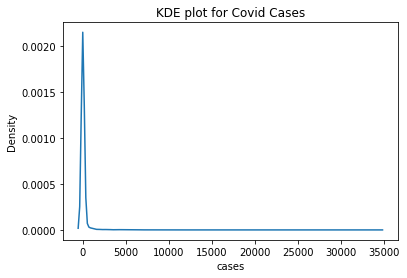

In [ ]:
sns.kdeplot(data=df,x='cases')
plt.title('KDE plot for Covid Cases')
plt.show()

#### Depict KDE plot for the cases for the month of Mar and Apr as hue

In [ ]:
# Extratcing data for the month of Mar and Apr
df_mar_apr = df[df['month'].isin([3,4])]  
df_mar_apr['month'].value_counts()

3    3815
4    1205
Name: month, dtype: int64

In [ ]:
df_mar_apr.shape

(5020, 11)

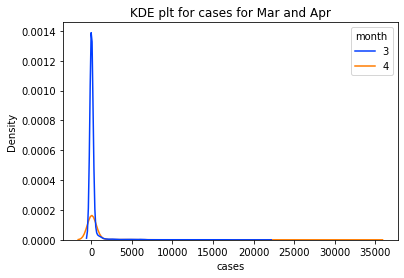

In [ ]:
sns.kdeplot(data=df_mar_apr,x='cases',hue='month',palette='bright')
plt.title('KDE plt for cases for Mar and Apr')
plt.show()

### Histplot
It is used to Plot univariate or bivariate histograms to show distributions of datasets.

Syntax<br>
<b>sns.histplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used for grouping)<br>


#### Plot histplot for cases for the Countries - India, Belgium and Russia for the months inlcuding Mar and Apr

In [ ]:
df_3c = df[df['countries'].isin(['India','Belgium','Russia'])]
df_3c.shape

(288, 11)

In [ ]:
df_3c['countries'].value_counts()

Belgium    98
India      97
Russia     93
Name: countries, dtype: int64

In [ ]:
# Filtering or Extracting the data from df_3c for the months of Mar and Apr
df_3c_mar_apr = df_3c[df_3c['month'].isin([3,4])]
df_3c_mar_apr.shape

(105, 11)

In [ ]:
df_3c_mar_apr['month'].value_counts()

3    87
4    18
Name: month, dtype: int64

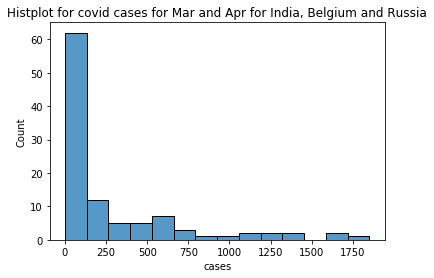

In [ ]:
sns.histplot(data=df_3c_mar_apr,x='cases')
plt.title('Histplot for covid cases for Mar and Apr for India, Belgium and Russia')
plt.show()

#### Plot histplot for cases for the Countries - India, Belgium and Russia for the months inlcuding Mar and Apr where month is set as hue parameter

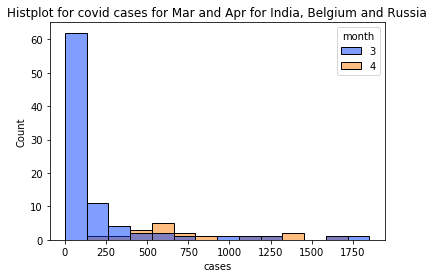

In [ ]:
sns.histplot(data=df_3c_mar_apr,x='cases',hue='month',palette='bright')
plt.title('Histplot for covid cases for Mar and Apr for India, Belgium and Russia')
plt.show()

#### Plot histplot for deaths for the Countries - India, Belgium and Russia for the month Mar and Apr

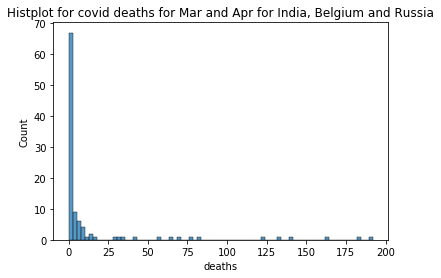

In [ ]:
sns.histplot(data=df_3c_mar_apr,x='deaths')
plt.title('Histplot for covid deaths for Mar and Apr for India, Belgium and Russia')
plt.show()

#### Plot histplot for deaths for the Countries - India, Belgium and Russia for the month Mar and Apr where month is set as hue parameter

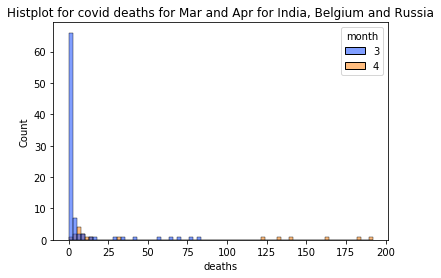

In [ ]:
sns.histplot(data=df_3c_mar_apr,x='deaths',hue='month',palette='bright')
plt.title('Histplot for covid deaths for Mar and Apr for India, Belgium and Russia')
plt.show()

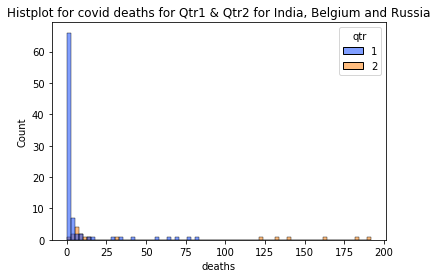

In [ ]:
sns.histplot(data=df_3c_mar_apr,x='deaths',hue='qtr',palette='bright')
plt.title('Histplot for covid deaths for Qtr1 & Qtr2 for India, Belgium and Russia')
plt.show()

### Heatmap

It is used to represent correlation

Syntax<br>
<b>sns.heatmap(data,annot,cmap)</b><br>
data - The correlation matrix<br>
annot - True or False. Whether or not to display te values in heatmap<br>
cmap - color palette<br>

#### Plot the correlation matrix on heatmap excluding the column year

In [ ]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')

In [ ]:
df1 = df.iloc[:,[1,2,4,5,10]]
df1.columns

Index(['day', 'month', 'cases', 'deaths', 'qtr'], dtype='object')

In [ ]:
corr = df1.corr()
corr

,day,month,cases,deaths,qtr
day,1.000000,-0.040470,-0.002845,-0.016463,-0.330084
month,-0.040470,1.000000,0.077225,0.081421,0.755988
cases,-0.002845,0.077225,1.000000,0.755922,0.067657
deaths,-0.016463,0.081421,0.755922,1.000000,0.085825
qtr,-0.330084,0.755988,0.067657,0.085825,1.000000


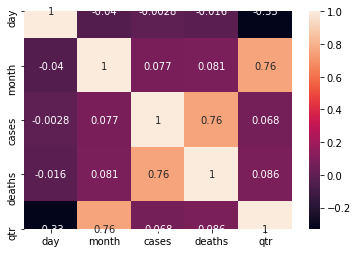

In [ ]:
sns.heatmap(data=corr,annot=True)
plt.show()

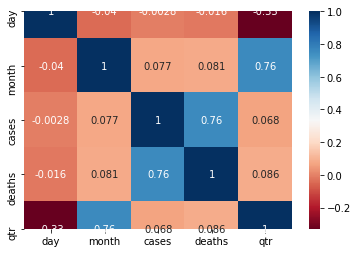

In [ ]:
sns.heatmap(data=corr,annot=True,cmap='RdBu')
plt.show()

In [ ]:
corr_cd = df.iloc[:,[4,5]].corr()
corr_cd

,cases,deaths
cases,1.000000,0.755922
deaths,0.755922,1.000000


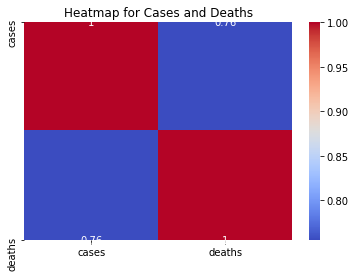

In [ ]:
sns.heatmap(data=corr_cd,annot=True,cmap='coolwarm')
plt.title('Heatmap for Cases and Deaths')
plt.show()

### Jointplot
It is used to depict a plot of two variables with bivariate and univariate graphs.<br>
It is a combination of scatterplot and histogram <br>

Syntax<br>
<b>sns.jointplot(data,x,y,hue,color,kind)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used for grouping)<br>
color - used to set the color of the jointplot<br>
kind - used to set the kinf of jointplot that we want to represent i.e. scatter, kde, hex etc<br>

#### Plot a jointplot between cases and deaths for the the countries - India, Belgium and Russia for the months inlcuding Mar and Apr

In [ ]:
df_3c_mar_apr['countries'].value_counts()

Belgium    37
India      36
Russia     32
Name: countries, dtype: int64

In [ ]:
df_3c_mar_apr['month'].value_counts()

3    87
4    18
Name: month, dtype: int64

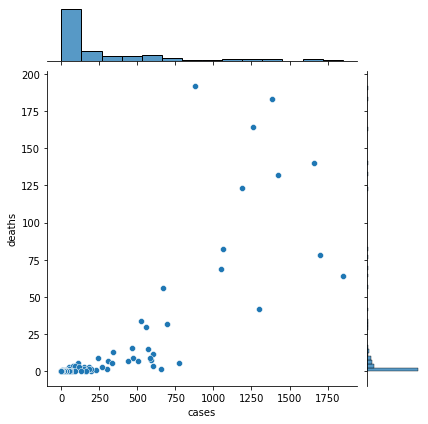

In [ ]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths')
plt.show()

#### Plot a jointplot between cases and deaths for the the countries - India, Belgium and Russia for the months inlcuding Mar and Apr where month is set as hue parameter

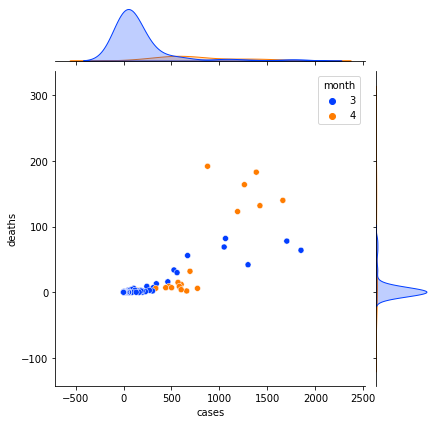

In [ ]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths',hue='month',palette='bright')
plt.show()

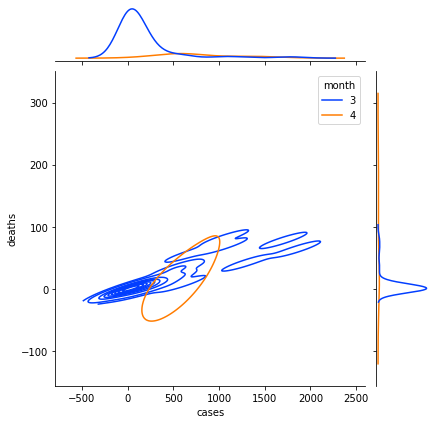

In [ ]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths',hue='month',palette='bright',kind='kde')
plt.show()

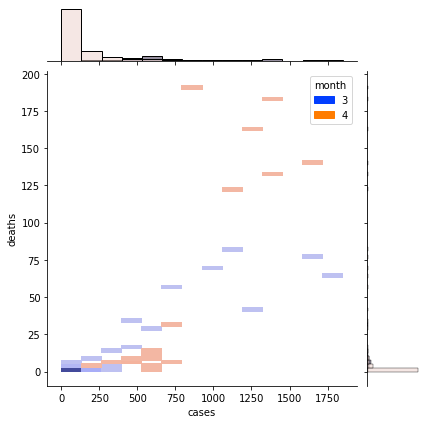

In [ ]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths',hue='month',palette='bright',kind='hist')
plt.show()

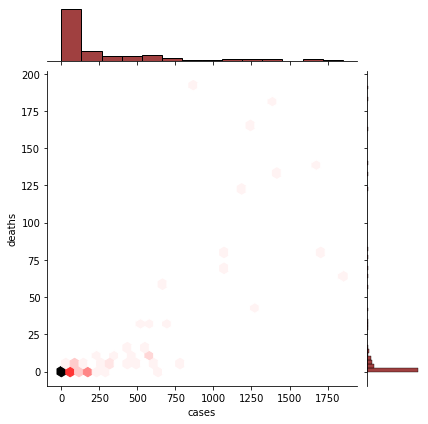

In [ ]:
sns.jointplot(data=df_3c_mar_apr, x='cases',y='deaths',palette='bright',
              kind='hex',color='maroon')
plt.show()